In [79]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [80]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 
                  'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 
                  'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 
                  'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 
                  'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 
                  'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 
                  'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 
                  'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 
                  'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 
                  'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 
                  'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 
                  'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 
                  'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 
                  'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 
                  'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 
                  'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 
                  'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 
                  'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 
                  'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 
                  'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 
                  'a5ce', 'a457', 'adab', 'aa46', 'a46a']
IMG_X = 100
IMG_Y = 100

In [81]:
def create_training_data():
    """takes no arguments, accessess data in file and returns it as a list containing [0] a unique id, 
    [1] category, [2] class_type, [3] category + class_type, [4] horizontal average, [5] vertical average, 
    [6] the original image resized to be a 100 X 100 array"""
    data = []
    unique_id = 0
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), 
                                       cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                horizontal_average = np.average(new_array, axis=1)
                vertical_average = np.average(new_array, axis=0)
                data.append([unique_id, category, class_type, category + "-" + class_type, 
                             horizontal_average, vertical_average, new_array])
                unique_id += 1
            except Exception as e:
                print('something went wrong')
    return data

In [82]:
complete_data = create_training_data()

In [83]:
complete_data[0][0]

0

In [84]:
complete_data[-1][0]

8231

In [85]:
len(complete_data)

8232

In [86]:
indexed_complete_data = complete_data.copy()

In [87]:
def shuffle(data):
    """takes a list of data as an input and outputs a shuffled list 
    with 100 testing data elements and the rest as training data"""
    random.shuffle(data)
    testing_data = data[-10:]
    training_data = data[0:-10]
    return data, testing_data, training_data

In [88]:
shuffled_data, testing_data, training_data = shuffle(complete_data)

In [89]:
shuffled_data[0][0]

7229

In [90]:
complete_data[0][0]

7229

In [91]:
indexed_complete_data[0][0]

0

In [92]:
shuffled_data[0]

[7229,
 'aaf7',
 'chuxi',
 'aaf7-chuxi',
 array([  3.08,   6.27,  10.18,  12.18,  15.5 ,  19.05,  19.05,  21.65,
         26.08,  28.24,  29.31,  29.3 ,  31.23,  34.95,  41.01,  49.39,
         57.94,  66.39,  78.01,  89.28,  97.41,  96.87,  92.61,  86.29,
         77.1 ,  67.22,  65.24,  61.91,  57.55,  51.46,  47.41,  45.38,
         41.35,  45.08,  59.63,  66.62,  73.63,  82.56,  87.35,  86.77,
         74.44,  71.09,  70.66,  68.45,  55.32,  36.88,  22.47,  19.96,
         26.27,  36.67,  42.84,  44.75,  48.69,  51.85,  53.91,  65.44,
         77.41,  88.1 ,  90.18,  90.19,  90.2 ,  94.84, 102.41, 115.15,
        115.53, 109.38, 102.87,  89.02,  70.08,  55.67,  46.28,  41.91,
         39.81,  39.59,  41.82,  38.39,  36.4 ,  38.52,  60.98,  84.85,
         99.55, 106.49, 110.95, 117.31,  98.95,  70.73,  68.46,  65.17,
         61.21,  59.09,  57.98,  57.9 ,  61.96,  60.85,  52.47,  40.47,
         25.12,   4.05,   0.  ,   0.  ]),
 array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+0

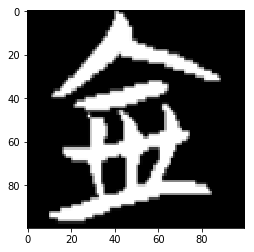

In [93]:
plt.imshow(shuffled_data[0][-1], cmap='gray')

In [94]:
def fingerprint_test(testing, training):
    """Takes our testing data and training data as inputs and returns our closest match for each of the testing images
    based on our 'training' images"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [95]:
test = fingerprint_test(testing_data, training_data)

In [96]:
def give_score(test):
    """Takes our return object from fingerprint_test and returns the percent accuracy of our model"""
    total = 0
    correct = 0
    for x, y in test:
        if indexed_complete_data[x][1] == indexed_complete_data[y][1]:
            correct += 1
        total += 1
    return correct/total

In [97]:
score = give_score(test)

In [98]:
score

0.9

In [99]:
len(test)

10

In [100]:
test[1]

[7253, 7308]

a4e9-chuxi


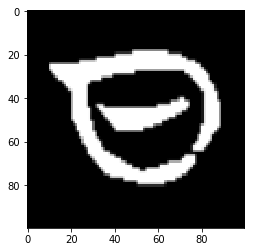

In [23]:
print(indexed_complete_data[test[1][0]][3])
plt.imshow(indexed_complete_data[test[1][0]][-1], cmap='gray')

a4e9-chuxi


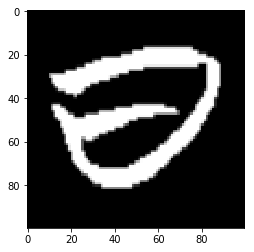

In [24]:
print(indexed_complete_data[test[1][1]][3])
plt.imshow(indexed_complete_data[test[1][1]][-1], cmap='gray')

In [25]:
def run_n_simulations(n, data):
    """Takes the number of simulations n and our original data as an input and shuffles the images n times 
    remember the accuracy of each shuffle then returns the overall percent accuracy a 
    long with the high and low accuracy"""
    all_scores = []
    for _ in range(n):
        shuffled_data, testing_data, training_data = shuffle(complete_data)
        test = fingerprint_test(testing_data, training_data)
        score = give_score(test)
        all_scores.append(score)
    return all_scores

In [26]:
%%time
returned_scores = run_n_simulations(100, complete_data)

CPU times: user 2min 10s, sys: 34.8 ms, total: 2min 10s
Wall time: 2min 10s


In [27]:
sum(returned_scores)/100

0.6700000000000002

### Take a dive into the best_guess list in fingerprint_test

In [ ]:
def fingerprint_test(testing, training):
    """Takes our testing data and training data as inputs and returns our closest match for each of the testing images
    based on our 'training' images"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [75]:
def fingerprint_test_top_values(testing, training):
    """does the same as fingerprint_test but takes a closer look at the best_guess list to see how the function
    is guessing"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0], y[3]])
        guesses.append([x[3], x[0], best_guess.sort(key=lambda x: x[0])])
            
            
            
#         list_of_indexes = np.argpartition([x[0] for x in best_guess], range(5))[:5]
#         guesses.append([x[3], [indexed_complete_data[x][3] for x in list_of_indexes]])
    return guesses

In [76]:
%%time
top_five = fingerprint_test_top_values(testing_data, training_data)

CPU times: user 1.4 s, sys: 1.51 ms, total: 1.41 s
Wall time: 1.41 s


In [69]:
for results in top_five:
    results[2].sort(key=lambda x: x[0])
    results[2] = results[2][:10]

In [78]:
top_five[1]

['a4e9-chuxi', 1401, None]

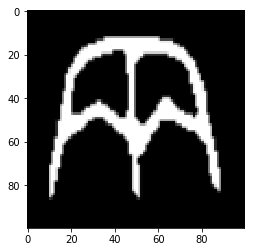

In [61]:
plt.imshow(indexed_complete_data[1205][-1], cmap='gray')

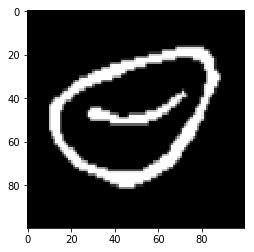

In [63]:
plt.imshow(indexed_complete_data[1317][-1], cmap='gray')

In [51]:
def give_score_from_top_five(test):
    """Takes our return object from fingerprint_test and returns the percent accuracy of our model"""
    total = 0
    correct = 0
    for x, y in test:
        if x == y[0]:
            correct += 1
        total += 1
    return correct/total

In [52]:
give_score_from_top_five(top_five)

ValueError: too many values to unpack (expected 2)

In [68]:
current = fingerprint_test(testing_data, training_data)

In [69]:
give_score(current)

0.69